In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split



### Support vector machines (SVMs) 
- A set of supervised learning methods used for classification, regression and outliers detection.

- The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

### The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

In [2]:
df_original= pd.read_csv('/home/bear/prakash/aai541/finalproject/data/train.csv')
df_test = pd.read_csv('/home/bear/prakash/aai541/finalproject/data/test.csv')
df_other = pd.read_csv('/home/bear/prakash/aai541/finalproject/data/other.csv')
df_original.shape
print("Train size:", len(df_original), "Train Patient Samples:", len(df_original.patient_id.unique()))
print("Test size:", len(df_test), "Test Patient Samples:", len(df_test.patient_id.unique()))
print("Other size:", len(df_other), "Other Patient Samples:", len(df_other.patient_id.unique()))

Train size: 754 Train Patient Samples: 632
Test size: 4 Test Patient Samples: 4
Other size: 396 Other Patient Samples: 336


In [3]:
from skimage.io import imread
from skimage.transform import resize

def load_image_files2(df, dimension= (256,256)):#(64, 64)):
 
    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    categories = ['CE', 'LAA']
#    for i, direc in enumerate(folders):
    for x in range(int(df.shape[0])):
        #img_tmp = OpenSlide(img_path)
        file = "./data/train_jpg2/"+df.image_id[x]+".jpg"
        img = imread(file)
        img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
        flat_data.append(img_resized.flatten()) 
        images.append(img_resized)
        label = df.label[x]
        if(label == "CE"):
            label = 0
        elif(label == "LAA"):
            label = 1
        target.append(label)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [4]:

image_dataset = load_image_files2(df_original, (256, 256))
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [5]:
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=1, kernel=linear; total time=  15.0s
[CV] END .................................C=1, kernel=linear; total time=  14.7s
[CV] END .................................C=1, kernel=linear; total time=  14.9s
[CV] END .................................C=1, kernel=linear; total time=  15.0s
[CV] END .................................C=1, kernel=linear; total time=  14.7s
[CV] END ................................C=10, kernel=linear; total time=  15.0s
[CV] END ................................C=10, kernel=linear; total time=  14.4s
[CV] END ................................C=10, kernel=linear; total time=  14.7s
[CV] END ................................C=10, kernel=linear; total time=  15.0s
[CV] END ................................C=10, kernel=linear; total time=  14.7s
[CV] END ...............................C=100, kernel=linear; total time=  14.9s
[CV] END ...............................C=100, ke

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=2)

In [6]:
y_pred = clf.predict(X_test)

print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=2):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       165
           1       0.00      0.00      0.00        62

    accuracy                           0.73       227
   macro avg       0.36      0.50      0.42       227
weighted avg       0.53      0.73      0.61       227




/home/bear/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bear/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bear/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
print(clf.best_params_)
print(clf.best_estimator_)
print(clf.cv_results_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.001)
{'mean_fit_time': array([12.34116907, 12.24109159, 12.3215189 , 12.07483711, 11.88532939,
       12.0519402 , 12.00682602, 11.99370785, 12.07245798]), 'std_fit_time': array([0.0949243 , 0.15390627, 0.09352884, 0.06138207, 0.08684012,
       0.0874947 , 0.06322991, 0.06477851, 0.10906654]), 'mean_score_time': array([ 2.49508829,  2.50882974,  2.49229274, 18.68153009, 18.10753584,
       18.74805231, 18.50483298, 18.71037617, 18.51032615]), 'std_score_time': array([0.05131856, 0.05983792, 0.0461042 , 0.27164849, 0.11245394,
       0.15173178, 0.10589899, 0.13082285, 0.14586844]), 'param_C': masked_array(data=[1, 10, 100, 1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'rbf', 'rbf', 'rbf',
                   'rbf', 'rbf', 'rbf'],
     

In [9]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred))


[[165   0]
 [ 62   0]]


<IPython.core.display.Javascript object>


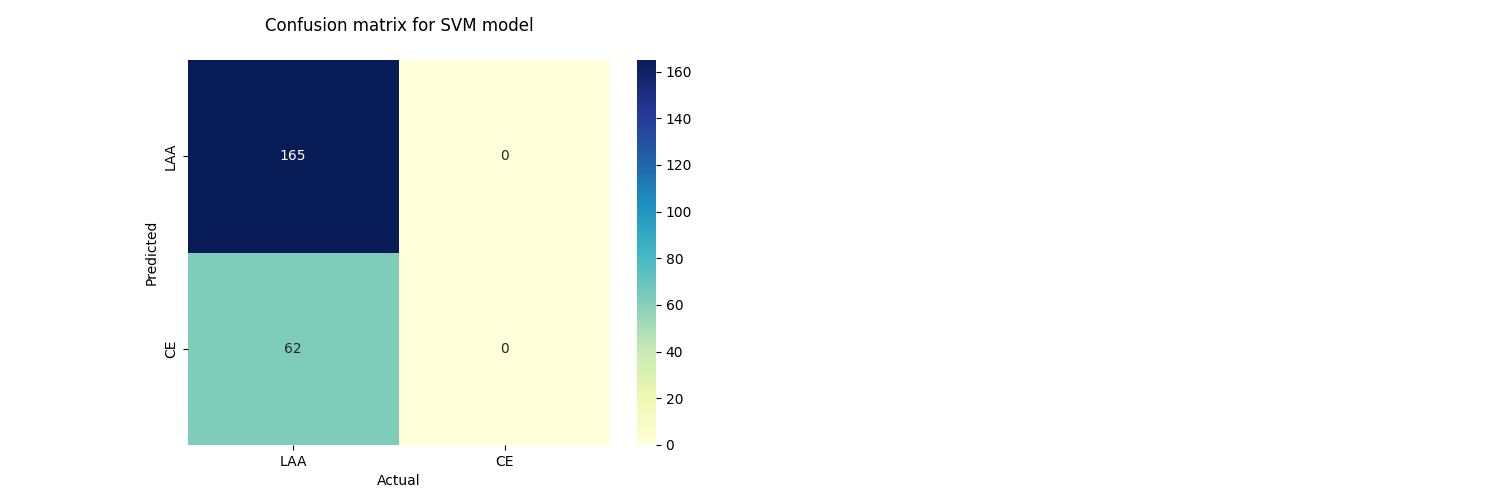

Confusion Matrix


Text(0.5, 25.722222222222214, 'Actual')

In [36]:
# Plot confusion matrices for benchmark and transfer learning models
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))


print('Confusion Matrix')


#pred_test = (pred_test >= 0.5).astype(np.int32)

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['LAA', 'CE'], columns=['LAA', 'CE'])
plt.subplot(121)
plt.title("Confusion matrix for SVM model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [18]:
svcDF = pd.DataFrame(clf.cv_results_)
print(svcDF.shape)
svcDF.head(5)

(9, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.341169,0.094924,2.495088,0.051319,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.716981,0.660377,0.638095,0.638095,0.685714,0.667853,0.030198,7
1,12.241092,0.153906,2.508830,0.059838,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.716981,0.660377,0.638095,0.638095,0.685714,0.667853,0.030198,7
2,12.321519,0.093529,2.492293,0.046104,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.716981,0.660377,0.638095,0.638095,0.685714,0.667853,0.030198,7
3,12.074837,0.061382,18.681530,0.271648,1,rbf,0.001,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.726415,0.726415,0.723810,0.723810,0.723810,0.724852,0.001276,1
4,11.885329,0.086840,18.107536,0.112454,1,rbf,0.0001,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.726415,0.726415,0.723810,0.723810,0.723810,0.724852,0.001276,1


In [20]:


plt.figure(1)
# summarize history for accuracy

plt.plot(svcDF['split0_test_score'])
plt.plot(svcDF['split1_test_score'])
plt.plot(svcDF['split2_test_score'])
plt.plot(svcDF['split3_test_score'])
plt.title('SVC Split Plot')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

/tmp/ipykernel_29886/1309842113.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<IPython.core.display.Javascript object>


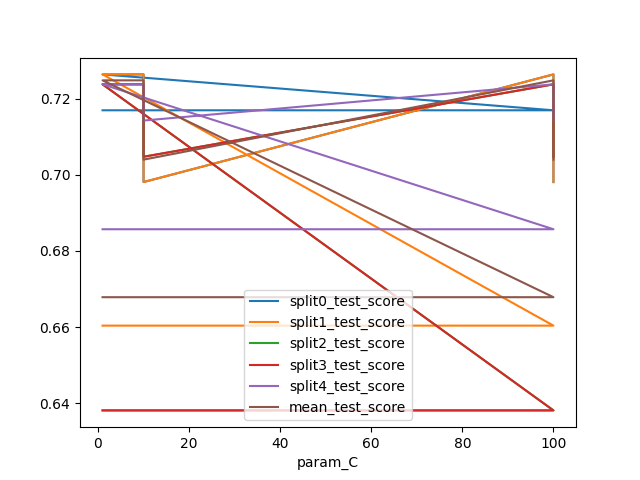

<Axes: xlabel='param_C'>

In [31]:

# plotting a bar graph
svcDF.plot(x="param_C", y=["split0_test_score", 'split1_test_score','split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score'], 
           kind="line")


<IPython.core.display.Javascript object>


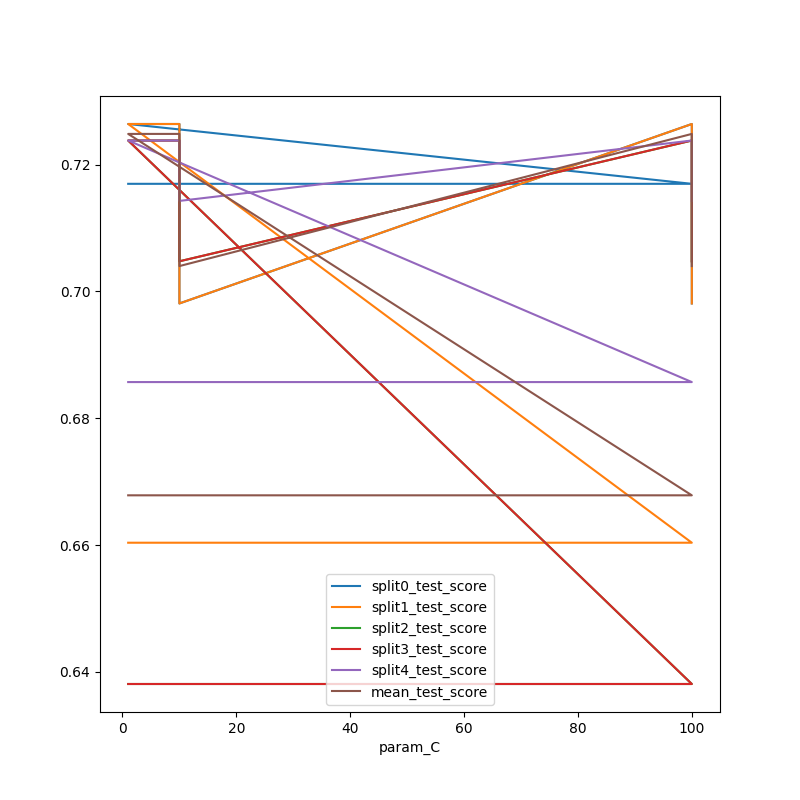

In [35]:

 
# plot multiple columns such as population and year from dataframe
svcDF.plot(x="param_C", y=["split0_test_score", 'split1_test_score','split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score'],
        kind="line", figsize=(8, 8))
 
# display plot
plt.show()